In [120]:
from sklearn.linear_model import LinearRegression    # type: ignore
from sklearn.metrics import mean_squared_error       # type: ignore
from sklearn.preprocessing import PolynomialFeatures # type: ignore
from sklearn.model_selection import train_test_split # type: ignore pip install scikit-learn

import operator 
import numpy as np
import pandas as pd                                  # type: ignore
import matplotlib.pyplot as plt                      # type: ignore

import warnings
warnings.filterwarnings('ignore')                    

In [19]:
car_df = pd.read_csv('https://raw.githubusercontent.com/ahartz1/car-linear-regression/master/car_data.csv', delimiter=',')
car_df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


Как правило признаки хранятся в матрице, а целевые значения хранится в векторе

In [20]:
car_df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [265]:
car_df[["Mileage"]].shape, car_df["Price"].shape 

((804, 1), (804,))

In [7]:
X = car_df[["Mileage"]]
y = car_df["Price"]

In [249]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [267]:
# y = w0 * x + bios
model.coef_, model.intercept_

(array([-0.1725205]), np.float64(24764.559006061685))

In [277]:
predict = model.predict(np.array([[8221]]))
predict

array([23346.26795261])

In [269]:
(-0.1725205 * 8221) + 24764.559006061685

23346.267975561685

In [17]:
uniq_make = car_df["Make"].unique()
print(f"{uniq_make}, {len(uniq_make)}")

['Buick' 'Cadillac' 'Chevrolet' 'Pontiac' 'SAAB' 'Saturn'], 6


In [18]:
pd.get_dummies(car_df.loc[:, "Make"])

,Buick,Cadillac,Chevrolet,Pontiac,SAAB,Saturn
0,True,False,False,False,False,False
1,True,False,False,False,False,False
2,True,False,False,False,False,False
3,True,False,False,False,False,False
4,True,False,False,False,False,False
...,...,...,...,...,...,...
799,False,False,False,False,False,True
800,False,False,False,False,False,True
801,False,False,False,False,False,True
802,False,False,False,False,False,True


In [24]:
car_df.head(1)

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1


In [92]:
car_df["Leather"] = car_df["Leather"].apply(bool)
car_df["Sound"] = car_df["Sound"].apply(bool)
car_df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,True,True
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,True,False
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,True,False
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,False,False
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,False,True


In [93]:
X = pd.get_dummies(car_df.loc[:, ["Mileage", "Liter", "Make", "Leather", "Model", "Sound"]])
y = pd.DataFrame(car_df["Price"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X.head(1)

,Mileage,Liter,Leather,Sound,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,...,Model_Lacrosse,Model_Lesabre,Model_Malibu,Model_Monte Carlo,Model_Park Avenue,Model_STS-V6,Model_STS-V8,Model_Sunfire,Model_Vibe,Model_XLR-V8
0,8221,3.1,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [60]:
len(car_df.columns)

12

In [53]:
y.head(1)

,Price
0,17314.103129


In [100]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [102]:
predict = model.predict(X_test)
print(round(np.abs(predict - y_test).mean()[0], 2))

1153.83


In [108]:
mean = round(car_df["Price"].mean(), 2)
print(f"Mean price value: {mean}")

Mean price value: 21343.14


In [117]:
print(f"{model.coef_[0][:2]}, {model.intercept_[0]}")

[-1.64372725e-01  2.30301892e+03], 19625.686047538933


# Полиномиальная регрессия

In [131]:
X = 2 - 3 * np.random.normal(0, 1, 50) 
y = X - 2 * (X**2) + 0.5 * (X ** 3) + np.random.normal(-3, 3, 50) 

X = X[:, np.newaxis]
y = y[:, np.newaxis]

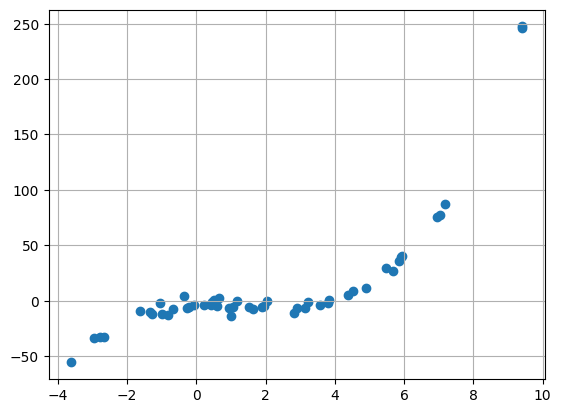

In [132]:
plt.scatter(X, y)
plt.grid()
plt.show()

In [133]:
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

MSE: 34.71934768190866


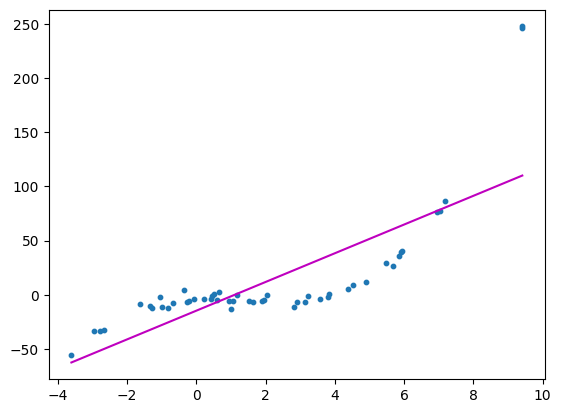

In [134]:
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"MSE: {rmse}")

plt.scatter(X, y, s=10)
sorted_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X, y_pred), key=sorted_axis)
x_, y_pred = zip(*sorted_zip)

plt.plot(x_, y_pred, color="m")
plt.show()

In [144]:
polynomial_features = PolynomialFeatures(degree=3)
X_poly = polynomial_features.fit_transform(X)
X_poly.shape

(50, 4)

In [146]:
model = LinearRegression()
model.fit(X_poly, y)
y_poly_pred = model.predict(X_poly)

MSE: 3.339521248178023


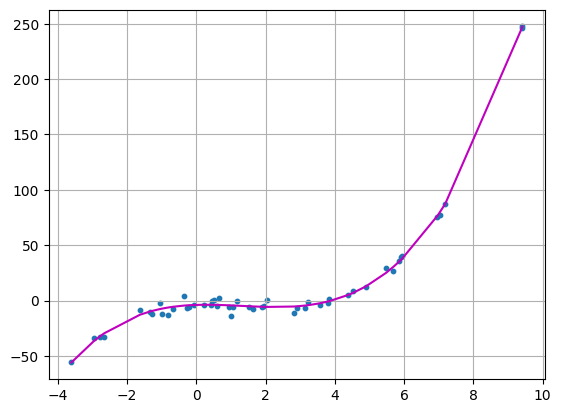

In [147]:
rmse = np.sqrt(mean_squared_error(y, y_poly_pred))
print(f"MSE: {rmse}")

plt.grid()
plt.scatter(X, y, s=10)

sorted_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X, y_poly_pred), key=sorted_axis)
x_, y_pred = zip(*sorted_zip)

plt.plot(x_, y_pred, color="m")
plt.show()


In [327]:
model.coef_

array([[ 0.        ,  1.0364627 , -2.00293239,  0.49928917]])